<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Pet-проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Чтение данных.

    * *main_df* - данные по соискателям от HeadHunter
   * *ex_rate* - данные по курсам валют

Данные представленны на период с 29.12.2017 по 05.12.2019.

In [2]:
main_df = pd.read_csv("../data/dst-3.0_16_1_hh_database.csv", sep=';')
ex_rate = pd.read_csv("../data/ExchangeRates.csv", sep=',')

2. Вывод первых строк таблицы, чтобы убедиться, что данные прочитаны верно.

In [3]:
main_df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Вывод основной информации (число непустых значений, тип данных).

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Вывод основной статистической информации о столбцах.


In [5]:
main_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Столбец **"Образование и ВУЗ"**. Текущий формат: **<Уровень образования год выпуска ВУЗ специальность...>**. К примеру:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…

Создание нового признака **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

In [6]:
def transform_education(education_string):
    """Возвращает уровень образования."""    
    parts = education_string.split()
    level = " ".join(parts[:2])
    if "Высшее образование" in level:
        return "высшее"
    elif "Неоконченное высшее" in level:
        return "неоконченное высшее"
    elif "Среднее специальное" in level:
        return "среднее специальное"
    elif "Среднее образование" in level:
        return "среднее"
    else:
        return "неизвестно" # на случай, если не нашлось совпадений


# вызов функции transform_education
main_df['Образование'] = main_df['Образование и ВУЗ'].apply(transform_education)
# проверка
print("Уникальные значения в новом признаке 'Образование':\n", main_df['Образование'].unique())
# удаление старого признака
main_df = main_df.drop('Образование и ВУЗ', axis=1)

Уникальные значения в новом признаке 'Образование':
 ['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


2. Столбец **"Пол, возраст"**. Представлен в формате **<Пол , возраст , дата рождения >**. К примеру:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000

Необходимо выделить каждый параметр в отдельный столбец.

Создание двух новых признаков **"Пол"** и **"Возраст"**.

In [7]:
def extract_gender_age(row):
    """Возвращает гендер."""
    parts = row.split(' , ')
    gender = parts[0]
    age_str = parts[1]
    if gender == "Мужчина":
        gender_code = 'М'
    elif gender == "Женщина":
        gender_code = 'Ж'
    else:
        gender_code = 'Неизвестно' # обработка нестандартных значений
    age = int(age_str.split()[0])
    return gender_code, age


# вызов функции extract_gender_age
main_df[['Пол', 'Возраст']] = main_df['Пол, возраст'].apply(extract_gender_age).apply(pd.Series)
# проверка
print("Уникальные значения в новом признаке 'Пол':\n", main_df['Пол'].unique())
print("\nУникальные значения в новом признаке 'Возраст':\n", main_df['Возраст'].unique())
# удаление старого признака
main_df = main_df.drop('Пол, возраст', axis=1)

Уникальные значения в новом признаке 'Пол':
 ['М' 'Ж']

Уникальные значения в новом признаке 'Возраст':
 [ 39  60  36  38  26  29  46  34  35  59  27  21  31  37  30  33  42  32
  23  28  25  24  43  53  49  44  48  54  22  20  40  62  72  45  41  61
  50  58  57  52  56  18  19  51  16  47  71  63  55  64  68  17  73  66
  65  77  67  69  76  70  14  15 100]


3. Преобразование **"Опыт работы"**. Текущий формат: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Необходимо выделить общий опыт работы соискателя в месяцах, новый признак **"Опыт работы (месяц)"**.

Особенности:
* Есть пропуски
* Для некоторых соискателей в столбце стоит значение "Не указано"
* Информацию, которая описывается после указания опыта работы, можно посчитать избыточной
* Опыт работы представлен только в годах или только месяцах. Встречаются следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…

In [8]:
def experience_to_month(experience_string):
    """Пересчет опыта работы в месяца."""
    try:
        parts = experience_string.split()
        job_ex = parts[2:6]  # отсекается "Опыт работы"
        check_list = (('год', 'года', 'лет'), ('месяц', 'месяца','месяцев'))
        
        if job_ex[1] in check_list[0] and job_ex[3] in check_list[1]:
            return int(job_ex[0]) * 12 + int(job_ex[2])
        elif job_ex[1] in check_list[0] and not job_ex[3] in check_list[1]:
            return int(job_ex[0]) * 12
        elif job_ex[1] in check_list[1]:
            return int(job_ex[0])
        else:
            return float('nan')
    except:
        return float('nan')


# вызов функции experience_to_month
main_df['Опыт работы (месяц)'] = main_df['Опыт работы'].apply(experience_to_month)
# удаление старого признака
main_df = main_df.drop('Опыт работы', axis=1)
# для целочисленного отображения месяцев и сохранения NaN
main_df['Опыт работы (месяц)'] = main_df['Опыт работы (месяц)'].astype('Int16')

4. Столбец **"Город, переезд, командировки"**. Информация в нем представлена в виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. К примеру, встречаются следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создание отдельных признаков **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**.

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург", "город-миллионник" и "другие".

    Список городов-миллионников:
  
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>

  Инфорацию о метро, рядом с которым проживает соискатель можно опустить.
* Возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки":
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Интересует только сам факт возможности или желания переезда.
* Возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки":
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    

  Интересует только сам факт готовности к командировке.
    
У некоторых соискателей отсутствует информация о готовности к командировкам. По умолчанию такие соискатели не готовы к командировкам.

In [9]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', \
                  'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

def process_city_data(row):
    """Разбор по признакам город/готовность."""
    status = ('готов', 'готова', 'хочу')
    try:
        parts = row.split(',')
        city = parts[0].strip()
        
        if city in ['Москва', 'Санкт-Петербург']:
            city_category = city
        elif city in million_cities:
            city_category = 'город-миллионник'
        else:
            city_category = 'другие'
        
        relocation_index = 1
        if "м." in parts[1].lower():
            relocation_index = 2
        
        relocation_phrase = parts[relocation_index].strip().lower()
        relocation_ready = "не" not in relocation_phrase
        commute_index = relocation_index + 1
        commute_ready = False  # по умолчанию - не готов
        
        if len(parts) > commute_index:
            commute_phrase = parts[commute_index].strip().lower()
            commute_ready = "не" not in commute_phrase
        return city_category, relocation_ready, commute_ready
        
    except (IndexError, AttributeError):
        return 'другие', False, False

# вызов функции process_city_data
main_df[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = main_df['Город, переезд, командировки'].apply(process_city_data).tolist()
main_df['Готовность к командировкам'] = main_df['Готовность к командировкам'].fillna(False)
# удаление старого признака
main_df = main_df.drop('Город, переезд, командировки', axis=1)

C:\Users\Egone Kater\AppData\Local\Temp\ipykernel_22016\1171171545.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df['Готовность к командировкам'] = main_df['Готовность к командировкам'].fillna(False)


5. Столбцы **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, к примеру:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Создание признаков для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

In [10]:
employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_types = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for emp_type in employment_types:
    main_df[emp_type] = main_df['Занятость'].str.contains(emp_type)

for sch_type in schedule_types:
    main_df[sch_type] = main_df['График'].str.contains(sch_type)

# удаление старого признака
main_df = main_df.drop(['Занятость', 'График'], axis=1)

6. Признак заработной платы **"ЗП"**. 
Помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, к примеру:
* 30000 руб.
* 50000 грн.
* 550 USD

Необходимо привести зарплатные значения к рублевым значениям.

In [11]:
# изменение типа данных с датами
ex_rate['date'] = pd.to_datetime(ex_rate['date'], format='%d/%m/%y')
main_df['Обновление резюме'] = pd.to_datetime(main_df['Обновление резюме'], format='%d.%m.%Y %H:%M')

def name_ISO(row):
    """Возвращает наименование валюты."""
    parts = row.split()
    value = parts[0]
    iso = parts[1]
    if iso == "грн.":
        iso = 'UAH'
    elif iso == "бел.руб.":
        iso = 'BYN'
    elif iso == "сум":
        iso = 'UZS'
    return value, iso


# вызов функции name_ISO
main_df[['ЗП', 'Валюта']] = main_df['ЗП'].apply(name_ISO).apply(pd.Series)
# объединение 2х датафреймов
merged_df = pd.merge(main_df, ex_rate, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')
# удаление дублирующих столбцов
merged_df = merged_df.drop(columns=['date', 'currency'])
# заполнение курса рубля
merged_df['close'] = merged_df['close'].fillna(1)  # заполнение NaN значением 1
merged_df['proportion'] = merged_df['proportion'].fillna(1)
# расчет ЗП
merged_df['ЗП (руб)'] = (pd.to_numeric(merged_df['ЗП']) * merged_df['close'] / merged_df['proportion']).astype('Int32')
# удаление лишних столбцов
main_df = merged_df.drop(columns=['ЗП', 'Валюта', 'per', 'time', 'close', 'vol', 'proportion'])
main_df.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16 15:59:00,Имеется собственный автомобиль,неоконченное высшее,М,39,202,другие,...,True,True,False,False,True,True,True,True,True,29000
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12 08:42:00,Не указано,высшее,М,60,233,другие,...,True,True,False,False,True,True,True,True,False,40000
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16 08:35:00,Не указано,среднее специальное,Ж,36,123,другие,...,False,False,False,False,True,False,False,False,False,20000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08 14:23:00,Не указано,высшее,М,38,225,другие,...,True,True,False,False,False,False,True,True,False,100000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22 10:32:00,Не указано,высшее,Ж,26,67,Москва,...,False,False,False,False,True,False,False,False,False,140000


# Исследование зависимостей в данных

1. Распределение признака **"Возраст"**.

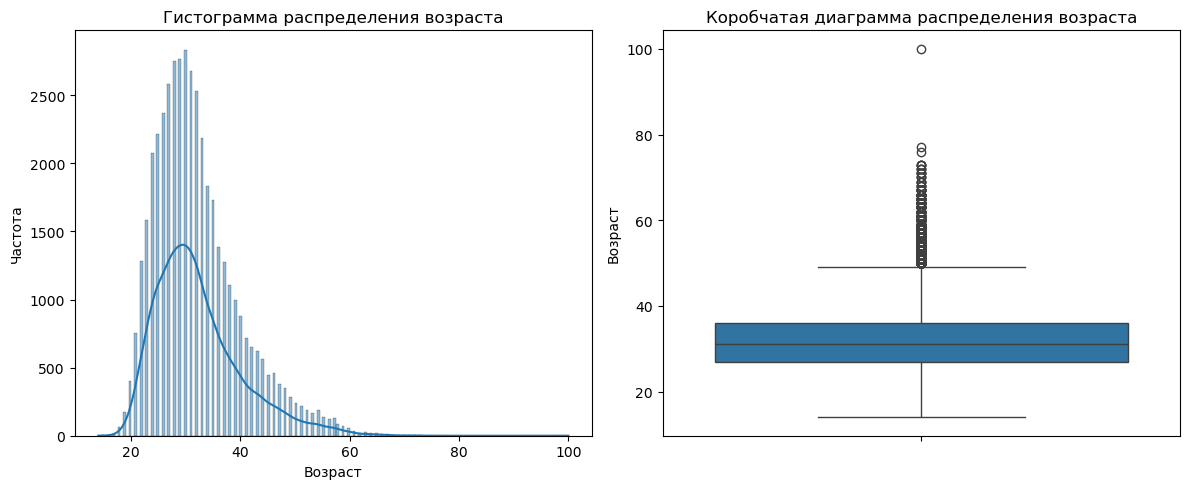

Мода: 30
Примерный интервал большинства соискателей: от 27.0 до 36.0


count    44744.000000
mean        32.196741
std          7.929800
min         14.000000
25%         27.000000
50%         31.000000
75%         36.000000
max        100.000000
Name: Возраст, dtype: float64

In [12]:
# гистограмма
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # первая из двух подграфиков
sns.histplot(main_df['Возраст'], kde=True)  # гистограмма с кривой плотности
plt.title('Гистограмма распределения возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')

# коробчатая диаграмма
plt.subplot(1, 2, 2)  # вторая из двух подграфиков
sns.boxplot(y=main_df['Возраст'])  # вертикальная коробчатая диаграмма
plt.title('Коробчатая диаграмма распределения возраста')
plt.ylabel('Возраст')

plt.tight_layout()  # настройка компоновки подграфиков
plt.show()


# анализ распределения
moda = main_df['Возраст'].mode()[0]
print(f"Мода: {moda}")

# интервал большинства соискателей
q1 = main_df['Возраст'].quantile(0.25)
q3 = main_df['Возраст'].quantile(0.75)
iqr = q3 - q1
print(f"Примерный интервал большинства соискателей: от {q1} до {q3}")

main_df['Возраст'].describe()

**Выводы:**
    
    Наибольшее количество соискателей находятся в возрасте 30 лет.

    Интервал большинства от 27 до 36 лет.

    Самому молодому соискателю 14 лет, что не противоречит законодательству и можно не причислять к аномальным значениям (выбросам).

    Однако, максимальный возраст соискателя 100 лет, что однозначно можно причислить к выбросам. По коробчатой диаграмме видно, что к аномальным значениям относятся возраста старше 50 лет (предел диаграммы).

2. Распределение признака **"Опыт работы (месяц)"**.

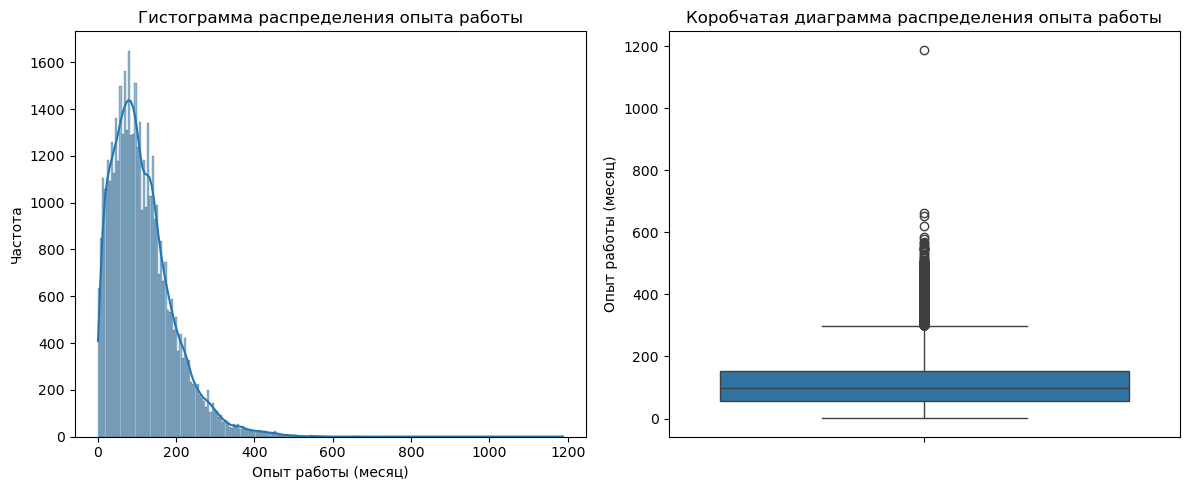

Мода: 81
Примерный интервал опыта работы большинства соискателей: от 57 до 154 месяцев


count       44574.0
mean     114.418944
std       79.047861
min             1.0
25%            57.0
50%           100.0
75%           154.0
max          1188.0
Name: Опыт работы (месяц), dtype: Float64

In [13]:
# гистограмма
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(main_df['Опыт работы (месяц)'], kde=True)
plt.title('Гистограмма распределения опыта работы')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Частота')

# коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(y=main_df['Опыт работы (месяц)'])
plt.title('Коробчатая диаграмма распределения опыта работы')
plt.ylabel('Опыт работы (месяц)')

plt.tight_layout()
plt.show()


# анализ распределения
moda = main_df['Опыт работы (месяц)'].mode()[0]
print(f"Мода: {moda}")

# интервал большинства соискателей
q1 = main_df['Опыт работы (месяц)'].quantile(0.25)
q3 = main_df['Опыт работы (месяц)'].quantile(0.75)
iqr = q3 - q1
print(f"Примерный интервал опыта работы большинства соискателей: от {q1:.0f} до {q3:.0f} месяцев")

main_df['Опыт работы (месяц)'].describe()

**Выводы:**

    У наибольшего количества соискателей опыт работы составляет 81 месяц.

    Интервал опыта работы находится в пределах от 57 до 154 месяцев.

    Из коробчатой диаграммы видно выброс 1188 месяцев (~99 лет), предел равен 300 месяцам.

3. Распределение признака **"ЗП (руб)"**.

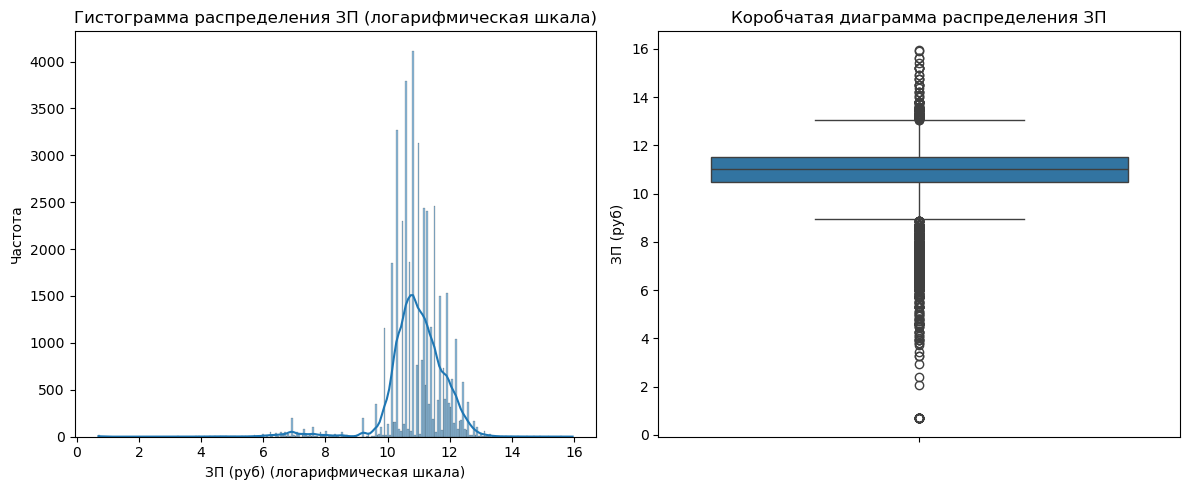

Мода: 50000


count          44744.0
mean      80004.634208
std      113629.442354
min                1.0
25%            36000.0
50%            60000.0
75%           100000.0
max          8500000.0
Name: ЗП (руб), dtype: Float64

In [14]:
# гистограмма с логарифмической шкалой
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(main_df['ЗП (руб)']), kde=True)  # логарифмическое преобразование для сглаживания
plt.title('Гистограмма распределения ЗП (логарифмическая шкала)')
plt.xlabel('ЗП (руб) (логарифмическая шкала)')
plt.ylabel('Частота')

# коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(y=np.log1p(main_df['ЗП (руб)']))
plt.title('Коробчатая диаграмма распределения ЗП')
plt.ylabel('ЗП (руб)')

plt.tight_layout()
plt.show()


# анализ распределения
moda = main_df['ЗП (руб)'].mode()[0]
print(f"Мода: {moda}")

main_df['ЗП (руб)'].describe()

**Выводы:**

    Чаще всего соискатели указывают оклад в 50000 руб.

    Интервал заработной платы находится в пределах от 36000 до 100000 руб.

    Медианный оклад равен 60000 руб. В среднем, ориентировочный интервал по окладу можно считать от 60000 до 80000 руб.

    К явным выбросам относятся зарплаты в 1 и 8500000 руб. Ориентировочный максимальный предел можно считать 1000000 руб. 

4. Зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**).

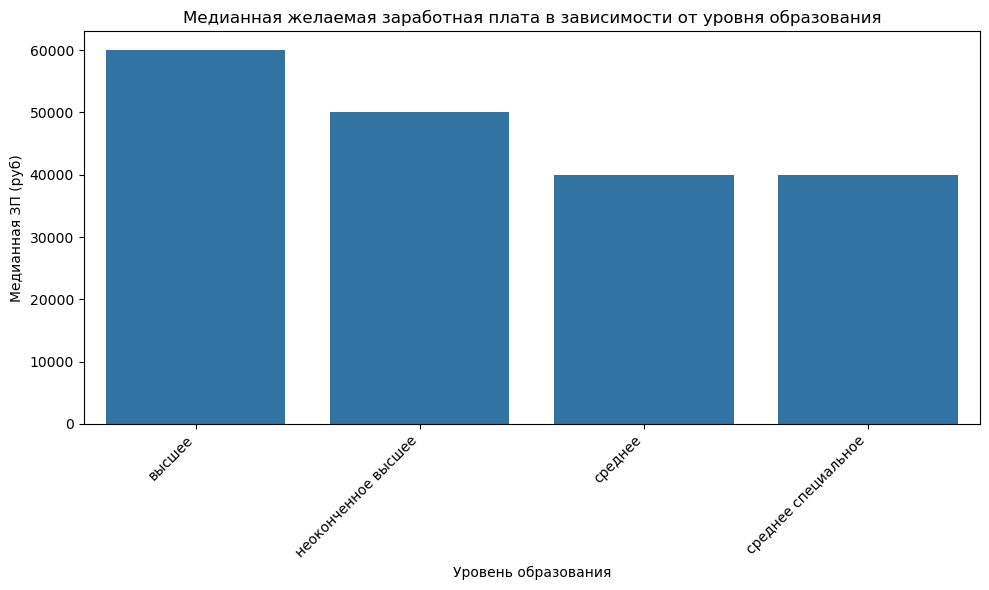

In [15]:
# фильтрация данных
main_df = main_df[main_df['ЗП (руб)'] < 1000000]
# группировка данных по уровню образования и вычисление медианной зарплаты
median_salary_by_education = main_df.groupby('Образование')['ЗП (руб)'].median()

# столбчатая диаграмма
plt.figure(figsize=(10, 6))
sns.barplot(x=median_salary_by_education.index, y=median_salary_by_education.values)
plt.title('Медианная желаемая заработная плата в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45, ha='right')  # поворот подписи по оси x для удобства чтения

plt.tight_layout()
plt.show()

**Вывод:**

    По графику видна зависимость заработной платы от уровня образования. Наибольший уровень оклада требуют соискатели  с высшим образованием.
    
    При прогнозировании заработной платы стоит учитывать уровень образования кандидата.

5. Распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**).

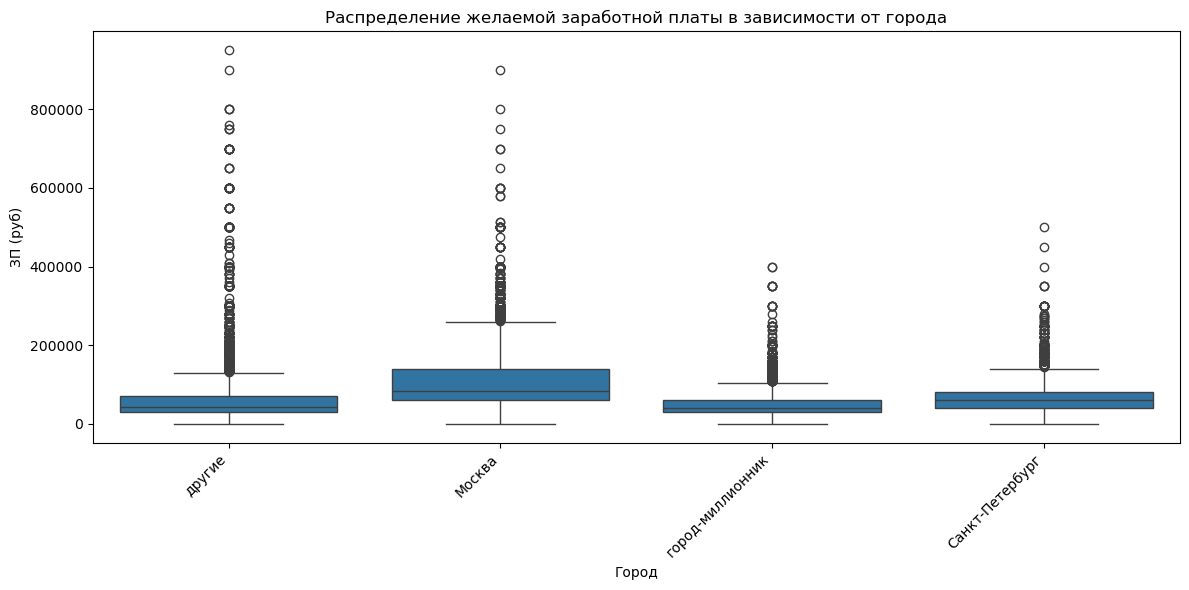

In [16]:
# фильтрация данных
main_df = main_df[main_df['ЗП (руб)'] < 1000000]

# построение коробчатой диаграммы
plt.figure(figsize=(12, 6))
sns.boxplot(x='Город', y='ЗП (руб)', data=main_df)
plt.title('Распределение желаемой заработной платы в зависимости от города')
plt.xlabel('Город')
plt.ylabel('ЗП (руб)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Выводы:**

    По графику видно, что при прогнозировании заработной платы стоит учитывать город проживания соискателя.

    Достаточно сильно отличаются размахи по верхним границам, а так-же медианные значения.

    Ожидаемо, что в Москве наибольший размах и среднее значение по окладу.

    Чем меньше город, тем меньше размах и среднее значение по заработной плате у соискателей.

6. Зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**.

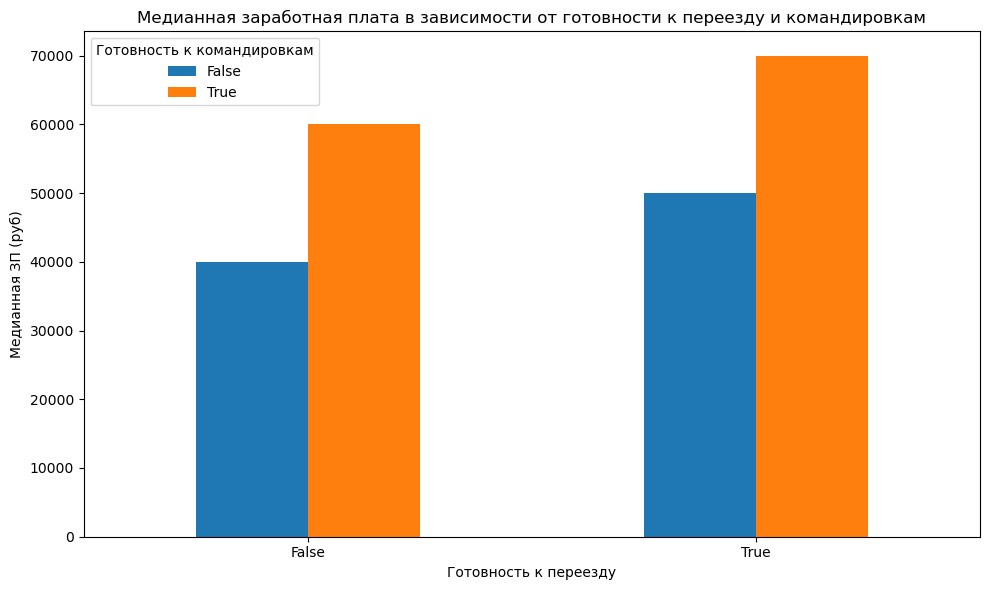

In [17]:
# группировка данных и вычисление медианной зарплаты
median_salary = main_df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()

# построение столбчатой диаграммы
median_salary.plot(kind='bar', figsize=(10, 6))
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=0)
plt.legend(title='Готовность к командировкам')

plt.tight_layout()
plt.show()

**Вывод:** Соискатели готовые к переезду и командировкам требуют уровень оклада выше.

7. Построение **диаграммы рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**).

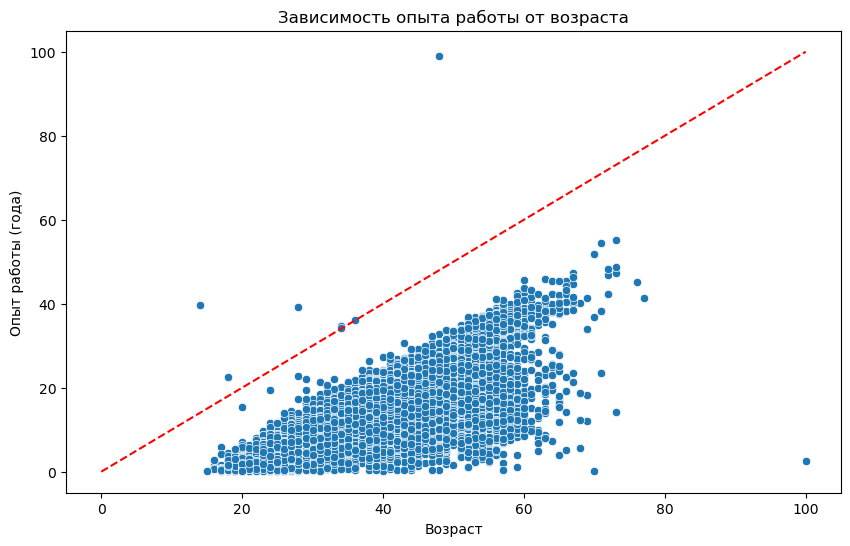

In [20]:
# построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Возраст', y=(main_df['Опыт работы (месяц)'] / 12), data=main_df)

# построение прямой y = x
x = np.linspace(0, 100, 100)  # массив значений x от 0 до 100
plt.plot(x, x, color='red', linestyle='--') # изображение прямой y = x

plt.xlabel('Возраст')
plt.ylabel('Опыт работы (года)')
plt.title('Зависимость опыта работы от возраста')
plt.show()

**Вывод:** Имеется небольшое количество выбросов. Большая часть значений находится в пределах нормы.

# Очистка данных

1. Удаление **полных дубликатов**.

In [21]:
main_df = main_df.drop_duplicates()

2. Вывод информации **о числе пропусков** в столбцах. 

In [22]:
missing_counts = main_df.isnull().sum()
print(missing_counts)

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64


3. Обработка пропусков в 3-ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**.

In [23]:
# удаление строк с пропусками в столбцах "Место работы" и "Должность"
main_df = main_df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
# заполнение пропусков в столбце "Опыт работы" медианным значением
main_df.fillna({'Опыт работы (месяц)': main_df['Опыт работы (месяц)'].median()}, inplace=True)

4. Очистка данных от выбросов. (значения заработной платы до 1000 и от 1000000 руб.)

In [24]:
main_df = main_df[(main_df['ЗП (руб)'] >= 1000) & (main_df['ЗП (руб)'] <= 1000000)]

5. При построении **диаграммы рассеяния** были обнаружены выбросы, в которых **опыт работы в годах превышал возраст соискателя**. Очистка данных от выбросов.


In [25]:
main_df = main_df[main_df['Опыт работы (месяц)'] / 12 <= main_df['Возраст']]

6. Обработка выбросов в признаке **"Возраст"**. Построение распределения в логарифмическом масштабе, обозначение границ (пределов). Поиск выбросов с помощью метода z-отклонения.

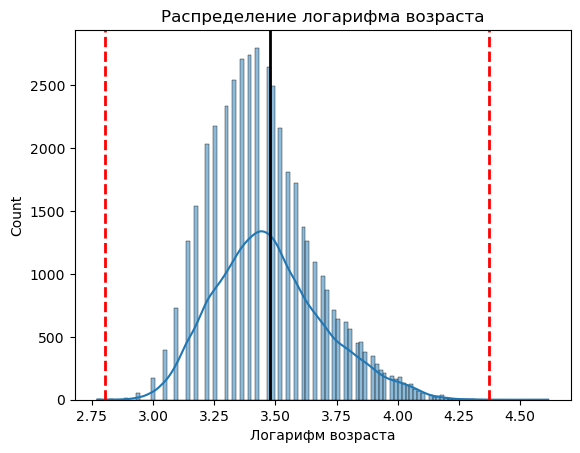

count    44132.000000
mean        32.218141
std          7.912558
min         15.000000
25%         27.000000
50%         31.000000
75%         36.000000
max         77.000000
Name: Возраст, dtype: float64

In [26]:
age = main_df['Возраст']
# логарифмирование возраста (1 для предотвращения логарифмирования 0)
log_age = np.log1p(age)

# построение гистограммы в логарифмическом масштабе
histplot = sns.histplot(log_age, kde=True)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='r', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='r', ls='--', lw=2)
histplot.set_xlabel('Логарифм возраста')
plt.title('Распределение логарифма возраста')
plt.show()

# нахождение выбросов с помощью метода z-отклонения (с послаблением на 4 сигмы)
z_scores = (log_age - log_age.mean()) / log_age.std()
outliers_mask = (z_scores > 4)

# удаление выбросов
main_df = main_df[~outliers_mask]

main_df['Возраст'].describe()

**Вывод:** Логарифмическое распределение ассмиетрично в право.
Соискатели возрастом младше 15 и старше 77 лет попадают в категорию выбросов.

# Резюме

Интервал возраста большинства соискателей составил от 27 до 36 лет. Большая часть находится в возрасте 30 лет, минимальный возраст от 14 лет. 

Опыт работы основной части кандидатов составил от 57 до 154 месяцев. Минимальный опыт работы около одного месяца.

Средний интервал заработной платы находится в пределах от 36000 до 100000 руб. Медианный оклад равен 60000 руб. В среднем, ориентировочный интервал по окладу можно считать от 60000 до 80000 руб.

При прогнозировании заработной платы стоит учитывать: 
* Уровень образования (кандидаты с высшим образованием указывают более высокий уровень оклада);
* Город проживания соискателя (чем меньше город, тем меньше ожидание по заработной плате);
* Готовность к командировкам/переезду (кандидаты готовые к переезду и командировкам требуют уровень оклада выше).

В данных наблюдались выбросы/аномалии (большие отклонения от нормы):
* По признаку "Возраст" аномальными данными можно считать кандидатов старше 77 лет (ориентировочный предел 50 лет);
* По признаку "Опыт работы" к выбросам можно отнести данные от 300 месяцев;
* По признаку "ЗП" ориентировочным предельным значением можно считать 300000 руб.